We are about to do the Logistic Regression, one of the basic statistical methods. Even though the name says "Regression", its actually a binary classification. So the output is yes or no, 1 or 0, cat or not cat, delay or no delay etc. 

To out learning curve smooth, lets start with something simple.
Lets work with a simple dataset.
And as always, at first we import the essential libraries, Pandas and NumPy.

In [1]:
import pandas as pd
import numpy as np

### **Toy Dataset: Exam Performance Prediction (Binary Classification)**
**Description**: Predict whether a student passes (`1`) or fails (`0`) based on study hours and sleep hours.

```csv
Study_Hours,Sleep_Hours,Pass
1.0,4.0,0
1.5,5.0,0
2.0,6.0,0
2.5,4.5,0
3.0,5.5,0
3.5,7.0,1
4.0,6.5,1
4.5,7.5,1
5.0,8.0,1
5.5,7.0,1
6.0,5.0,0
6.5,8.5,1
7.0,9.0,1
7.5,6.0,1
8.0,9.5,1
8.5,7.5,1
9.0,10.0,1
9.5,5.5,1
10.0,8.5,1
10.5,9.0,1
```

#### **Columns**
- `Study_Hours`: Hours studied (numerical, range: 1.0–10.5)  
- `Sleep_Hours`: Hours slept (numerical, range: 4.0–10.0)  
- `Pass`: Binary label (`0` = Fail, `1` = Pass)  

Lets visualize the data here, to see how it talks to us: 

In [2]:
import numpy as np

# Features (Study Hours, Sleep Hours)
X = np.array([
    [1.0, 4.0], [1.5, 5.0], [2.0, 6.0], [2.5, 4.5], [3.0, 5.5],
    [3.5, 7.0], [4.0, 6.5], [4.5, 7.5], [5.0, 8.0], [5.5, 7.0],
    [6.0, 5.0], [6.5, 8.5], [7.0, 9.0], [7.5, 6.0], [8.0, 9.5],
    [8.5, 7.5], [9.0, 10.0], [9.5, 5.5], [10.0, 8.5], [10.5, 9.0]
])

# Labels (0 = Fail, 1 = Pass)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

print("Features (X):\n", X)
print("Labels (y):", y)

Features (X):
 [[ 1.   4. ]
 [ 1.5  5. ]
 [ 2.   6. ]
 [ 2.5  4.5]
 [ 3.   5.5]
 [ 3.5  7. ]
 [ 4.   6.5]
 [ 4.5  7.5]
 [ 5.   8. ]
 [ 5.5  7. ]
 [ 6.   5. ]
 [ 6.5  8.5]
 [ 7.   9. ]
 [ 7.5  6. ]
 [ 8.   9.5]
 [ 8.5  7.5]
 [ 9.  10. ]
 [ 9.5  5.5]
 [10.   8.5]
 [10.5  9. ]]
Labels (y): [0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [3]:
df = pd.DataFrame({
    'Study_Hours': X[:, 0],  # First column of X
    'Sleep_Hours': X[:, 1],  # Second column of X
    'Pass': y
})

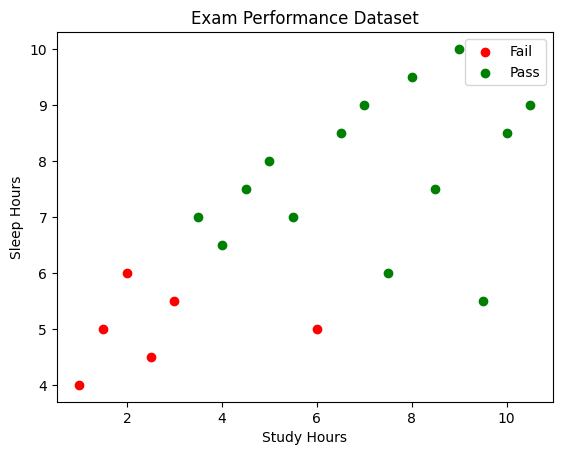

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Fail')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Pass')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.legend()
plt.title('Exam Performance Dataset')
plt.show()

<Axes: xlabel='Study_Hours', ylabel='Sleep_Hours'>

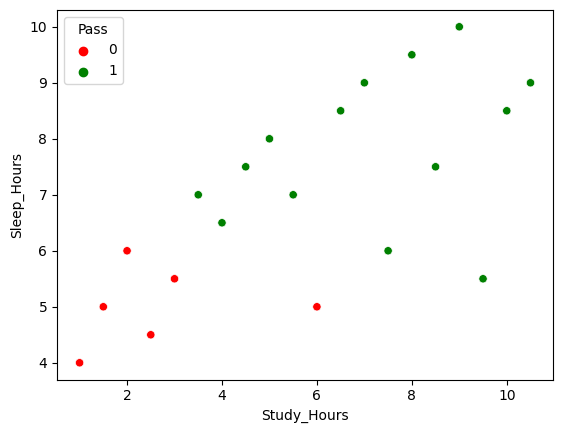

In [5]:
import seaborn as sns
sns.scatterplot(data=df, x='Study_Hours', y='Sleep_Hours', hue='Pass', palette=['red', 'green'])

Hmm, it's pretty easy. Because it's made up. We can almost divide the 0 and 1 simply by drawing a line between them. Lets see how that works. 

As we said before, we can try to draw a straight line and separate the reds from greens. Lets take that approach.
If we want to draw a line, we need a line's equation. The simplest equation we have is:

$$Y = ax + b$$

where, "a" is the slope of "x", the input variable. And "b" is the bias. "a" decide the rate of change in Y from x, and "b" is the headstart, or how much elevation we get.
Now, we need to find Y, and Y isn't exactly ax + b. We have to apply a function to get Y. It's more like $$Y = some_function(ax + b)$$
Let's take a another variable z, z = ax+b. Later we can get the value of Y from z.  
One more problem, we have two different values of x here. The "study hours" and the "sleep hours".
We can work with that. Essentialy, we have to assume that study hours and sleep hours dont affect result similarly. Probably study hour is more important? And sleep hour is not that important? But we can not run on 0 hour of sleep, can we?
So, these two independant variable, x1 (study hour), and x2(sleep hour) should be "weighted" differently. 
Here, weights = [w1, w2]
So, $$z = w1 * x1 + w2 * x2 + b$$

In [6]:
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

X_bias is an array that consist of b, x1, x2.

We are going to split the dataset into train and test part. Our regression will learn from train set, and test the hypothesis on the test set.
We are doing 80% 20% split here.

In [7]:
np.random.shuffle(X_bias) #shuffling the dataset

In [8]:
train_size = int(len(X_bias) * 0.8)  # 80% of the total length
train_set = X_bias[:train_size]  # First 80% of elements
test_set = X_bias[train_size:]  # Remaining 20% of elements

We are initializing weight array.

In [9]:
w = np.zeros(X_bias.shape[1])  # Shape: (3,) for [bias, w1, w2]

Remeber when we said we need to put "z" through some function to get "Y"? We have to make that function now. That function is sigmoid function. Its a function that maps real number values to 0 or 1. That means, we send some "z", we get some 0 or 1, and those values are "y".

The sigmoid function is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$


now we are going to implement the function here.

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Now, the weight and bias we initiated randomly, aren't necessarily accurate. We need to change that. In fact, we need to change it a lot of times till it gives us a line that's the perfect fit. If not, it should be near perfect. Also, the need to see the cost or the error. Error is the difference of the real value of y and the hypothetical value of y. Here, the cost function is 
$$J(w) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log a^{(i)} + (1 - y^{(i)}) \log (1 - a^{(i)}) \right]$$
where:
- \( m \) is the number of training examples.
- \( y^{(i)} \) is the actual label (0 or 1).
- \( a^{(i)} \) is the predicted probability from the sigmoid function.

We have to update the weights till we find the optimal weights. That means, we have to find the perfect or near perfect w1, w2 weights for variable x1, x2 to plug into the equation.

### Gradient Descent Formula

The weight update rule in gradient descent is:

$$ w := w - \alpha \frac{\partial J}{\partial w} $$

where:
- \( w \) represents the weights.
- \( \alpha \) is the learning rate.
- \( \frac{\partial J}{\partial w} \) is the gradient of the cost function with respect to \( w \).

For logistic regression, the gradient descent update for weights and bias is:

$$ w := w - \alpha \frac{1}{m} \sum_{i=1}^{m} X^{(i)} (A^{(i)} - Y^{(i)}) $$

$$ b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} (A^{(i)} - Y^{(i)}) $$

where:
- \( m \) is the number of training examples.
- \( X^{(i)} \) is the input feature vector.
- \( A^{(i)} \) is the predicted probability from the sigmoid function.
- \( Y^{(i)} \) is the actual label.


We will adjust the weights 1000 times. These attempts are called epochs. 


### What Happens in One Epoch: ###


*Forward Pass:* Compute predictions (A) and cost for all 20 examples.

In [11]:
def forward(X, w):
    z = np.dot(X, w)
    A = sigmoid(z)  # Predicted probabilities
    J = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))  # Cross-entropy cost
    return A, J

*Backward Pass:* Calculate the gradient (dw) by averaging contributions from all examples.

In [12]:
def backward(X, A, y):
    dw = np.dot(X.T, (A - y)) / len(y)  # Gradient for weights
    return dw

*Update Weights:* Adjust w using the gradient: $$w = w - \alpha * dw.$$
Here, $$\alpha$$ is the learning rate.

We have the liberty to choose the learning rate. But we should be careful, since with smaller learning rate, we need way more epochs and if we set it too big, we might cross the optimal point.

In [13]:
alpha = 0.01  # Learning rate
epochs = 100

for epoch in range(epochs):
    A, cost = forward(X_bias, w)  # Forward pass
    dw = backward(X_bias, A, y)   # Backward pass
    w -= alpha * dw               # Update weights
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost:.4f}")

Epoch 0, Cost: 0.6931


Now we check how good our hypothesis is after adjusting the weights **1,000** times!

In [14]:
def predict(X, w):
    A, _ = forward(X, w)
    return (A >= 0.5).astype(int)  # Threshold at 0.5

y_pred = predict(X_bias, w)

In [15]:
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.00%


Honestly, it's not good. **Only 70.00% accuracy!**
But at least we learned something.
Let's visually see  how our hypothesis worked.

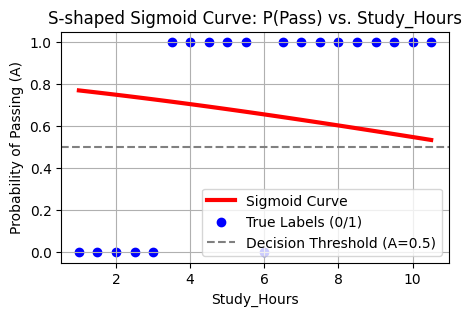

In [16]:
# Fix Sleep_Hours at median (or mean)
sleep_fixed = np.median(X[:, 1])  # Try np.mean() if needed

# Create a range of Study_Hours values
study_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)

# Compute predicted probabilities (A) for each Study_Hours
z = w[0] + w[1] * study_range + w[2] * sleep_fixed
A = sigmoid(z)  # S-curve probabilities

# Plot
plt.figure(figsize=(5, 3))
plt.plot(study_range, A, color='red', linewidth=3, label='Sigmoid Curve')
plt.scatter(X[:, 0], y, color='blue', label='True Labels (0/1)')  # Actual data
plt.xlabel('Study_Hours')
plt.ylabel('Probability of Passing (A)')
plt.title('S-shaped Sigmoid Curve: P(Pass) vs. Study_Hours')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Threshold (A=0.5)')
plt.legend()
plt.grid(True)
plt.show()

### Real dataset ###

As the next step of our learning, we should see how to apply our knowledge on real life dataset.

This is dataset that consists of cancer images and images that are not of cancer. This could be a good dataset to train a model for binary classification.

In [17]:
import os
import cv2
import numpy as np

dataset_path = '/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data'

# Initialize lists
images = []
labels = []

# Label map based on top-level folder names
label_map = {'Cancer': 1, 'Non_Cancer': 0}

# Walk through directory tree
for category in ['Cancer', 'Non_Cancer']:
    for split in ['Training', 'Testing']:
        folder_path = os.path.join(dataset_path, category, split)
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.jpg', '.png')):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (64, 64))  # Resize to match model input
                images.append(img)
                labels.append(label_map[category])

# Convert to NumPy arrays
X = np.array(images) / 255.0  # Normalize pixel values
y = np.array(labels)

print("Loaded images shape:", X.shape)
print("Labels shape:", y.shape)


Loaded images shape: (288, 64, 64, 3)
Labels shape: (288,)


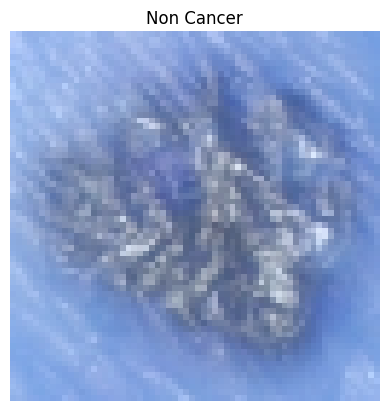

In [18]:
import matplotlib.pyplot as plt

idx = 166

plt.imshow(X[idx])
plt.axis('off')
plt.title("Cancer" if y[idx] == 1 else 'Non Cancer')
plt.show()

Now, we have loaded the images in an array X and the labels in an array y. But there is a slight problem.

In [19]:
X.shape

(288, 64, 64, 3)

There are 288 examples. That's not the problem. The problem is, instead of two attributes like "study hours" and "sleep hours", we have a 3D array of shape (64, 64, 3) size!
That is because, the images are 64 * 64 pixels big, and has 3 color combinations (RGB values). So we have to deal with 64 * 64 * 3 = 12,288 numerical values for each images! But we can do that.

To deal with 3 dimensional instances, at first we have to flatten them. making X.shape = (288, 64, 64, 3) to X.shape = (288, 12288)

In [20]:
X_flattened = X.reshape(X.shape[0], -1)  # Shape: (288, 12288)
X_flattened.shape

(288, 12288)

Now, all of these 188 * 12288 values are between 0 to 255 because they are RGB values. We normalize this value by dividing them by 255, so now they have values between 0.0 and 1.0.

In [21]:
X_normalized = X_flattened / 255.0

We are appending bias weight with the dataset now.

In [22]:
X_bias = np.c_[np.ones(X_normalized.shape[0]), X_normalized]  # Shape: (288, 12289)

 Here, the weight matrix is initiated, and the shape is 12289. Why 12289 instead of 12288? because, $$z = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + ...... + w_12288x_12288 $$

we have to initiate bias matrices. They have to be initiated randomly and the values shouldn't be very large.

In [23]:
np.random.seed(42)
w = np.random.randn(X_bias.shape[1]) * 0.01  # Shape: (12289,)

Now we train our model. We run it for 1000 epochs and learning rate = 0.01

In [24]:
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    A, loss = forward(X_bias, w)
    
    # Backward pass
    dw = backward(X_bias, A, y)
    
    # Update weights
    w -= learning_rate * dw
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.6940
Epoch 100, Loss: 0.6582
Epoch 200, Loss: 0.6369
Epoch 300, Loss: 0.6241
Epoch 400, Loss: 0.6162
Epoch 500, Loss: 0.6114
Epoch 600, Loss: 0.6084
Epoch 700, Loss: 0.6065
Epoch 800, Loss: 0.6053
Epoch 900, Loss: 0.6045


lets predict and see the accuracy of our logistic regression model

In [25]:
def predict(X, w):
    A = sigmoid(np.dot(X, w))
    return (A >= 0.5).astype(int)

y_pred = predict(X_bias, w)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 70.83%


The loss curve is visualised here. We can see that the loss is decreasing with more epochs.

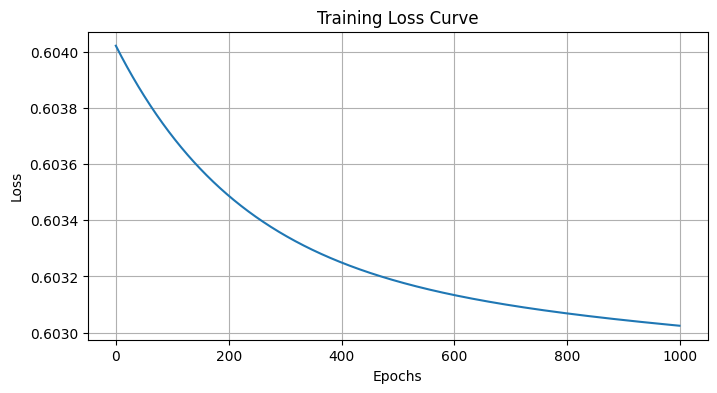

In [26]:
loss_history = []
for epoch in range(epochs):
    A, loss = forward(X_bias, w)
    dw = backward(X_bias, A, y)
    w -= learning_rate * dw
    loss_history.append(loss)  # Store loss

# Plot
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

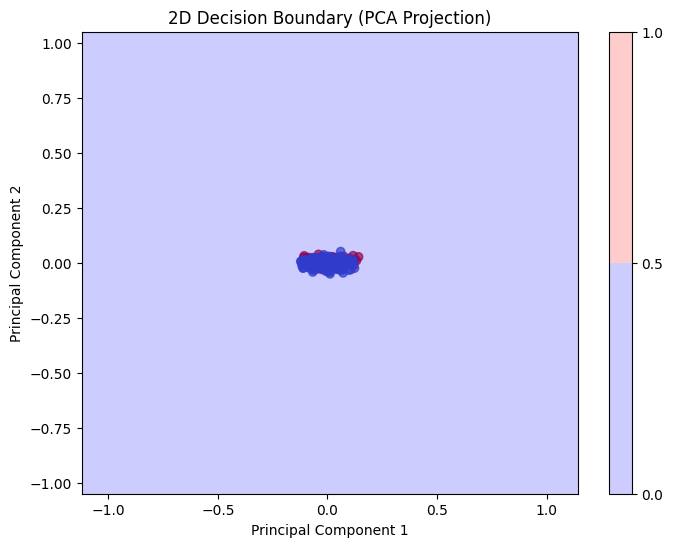

In [27]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_normalized)

# Train logistic regression on 2D data (for visualization only)
w_2d = np.random.randn(3) * 0.01  # 2 features + bias
X_2d_bias = np.c_[np.ones(X_2d.shape[0]), X_2d]

for _ in range(1000):
    A_2d, _ = forward(X_2d_bias, w_2d)
    dw_2d = backward(X_2d_bias, A_2d, y)
    w_2d -= 0.1 * dw_2d

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', alpha=0.7)

# Create decision boundary grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                     np.linspace(y_min, y_max, 100))
Z = sigmoid(w_2d[0] + w_2d[1] * xx.ravel() + w_2d[2] * yy.ravel())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.2)
plt.colorbar()
plt.title('2D Decision Boundary (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()